<a href="https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src='https://seeklogo.com/images/S/stone-pagamentos-logo-781DFFF629-seeklogo.com.png'/> 



Este notebook foi criado para responder às perguntas do [Conta Stone's Data Intern Challenge](https://gist.github.com/caiotaniguchi/8b5ee7dc75c8b6426222942ced90c4c1#file-dataset-customers-csv-L2469).

In [1]:
# Import das bibliotecas mais usadas em ciência de dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Criando DataFrames para cada dataset disponibilizado
card_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-cards.csv"

customers_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-customers.csv"

fraud_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63\
/dataset-frauds.csv"

transactions_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-transactions.csv"


df_card = pd.read_csv(card_url, sep=';')

df_customers = pd.read_csv(customers_url, sep=';')

df_fraud = pd.read_csv(fraud_url, sep=';')

df_transactions = pd.read_csv(transactions_url, sep=';')



---



**Questões**



1.   *Extract and analyze the data in order to answer the following questions. Provide a description and/or comments for each solution.*



- What is the average age of the customers in the database?

In [3]:
# pegando a coluna age (idade)
age = df_customers['age']

# pegando a média de idades
avg_age = age.mean()

# printando a idade média arredondada com duas casas depois da vírgula
print("The average age of the customers in the database is {} years old. \
(Approximately {} years and {} days old.)"\
      .format(round(avg_age, 2), round(avg_age), round((avg_age-int(avg_age))*365)))

The average age of the customers in the database is 35.06 years old. (Approximately 35 years and 22 days old.)




---



- How is the card_family ranked based on the credit_limit given to each card?

Inicialmente pensei em olhar para a média de limite de crédito, entretanto olhei primeiro para a quantidade de cada card_family no dataset, pois uma pequena quantidade de uma determinada card_family poderia acarretar uma grande média de credit_limit, o que enviesaria a análise.

In [4]:
# Pegando todas as distintas card_families no dataset
card_families = np.unique(df_card['card_family'])

# Pegando a quantidade de cada card_family no dataset
family_quantity = [(family, df_card['card_family'].loc\
                    [df_card.card_family == family]\
                   .count()) for family in card_families]

"""
Ordenando family_quantity na ordem decrescente, baseado na quantidade daquela
card_family
"""
family_quantity.sort(key=lambda qty: qty[1], reverse=True)

# Separando a card_family de sua quantidade
family_quantity = zip(*family_quantity)
family_quantity = list(family_quantity)

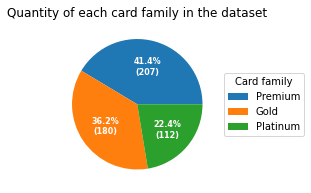

In [5]:
"""
Plotando um gráfico de setores com os resultados 
sobre as quantidades de card_family
"""

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = family_quantity[1]
card_families = family_quantity[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Card family",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantity of each card family in the dataset")

plt.show()

Plotando um gráfico de barras para visualizar a média de limite de crédito (credit_limit) para cada card_family

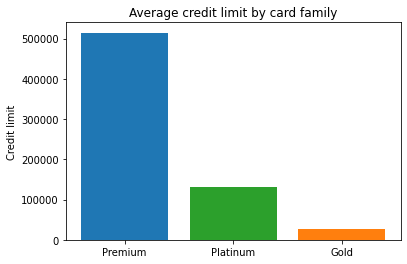

In [6]:
# Pegando a média de credit_limit para cada card_family
avg_credit_limit = [(family, np.array(df_card['credit_limit'].loc\
                                      [df_card.card_family == family]).mean())\
                     for family in card_families]

# Ordenando avg_credit_limit em ordem descrescente pela média daquela card_family
avg_credit_limit.sort(key=lambda family_credit_limit: family_credit_limit[1], \
                      reverse=True)

# Separando a card_family de sua média
avg_credit_limit = zip(*avg_credit_limit)
avg_credit_limit = list(avg_credit_limit)

# Plotando o gráfico
plt.bar(avg_credit_limit[0], avg_credit_limit[1], color=['tab:blue', 'tab:green', 'tab:orange'])
plt.title("Average credit limit by card family")
plt.ylabel("Credit limit")
plt.show()

Como vimos, a quantidade de cada card_family é bastante diferente. Portanto o gráfico de média acima pode não ser um bom indicador sobre a relação entre card_family e credit_limit.

*Como resolver isto?*

Sugestões:
- Balancear os dados (fazer com que a quantidade das 3 card_family seja a mesma);
- Procurar correlação entre card_family e credit_limit de outra maneira que não seja pela média.

In [7]:
# TODO



---



 - For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

In [11]:
# Pegando o id das transações fraudulentas (organizados do maior value para o menor)
frauds = np.array(df_fraud['transaction_id'].loc[df_fraud['fraud_flag'] == True])
df_fraud_transactions = df_transactions.loc[df_transactions['id'].isin(frauds)]
df_fraud_transactions = df_fraud_transactions.sort_values(by='value', ascending=False)
for i in range(1, len(list(df_fraud_transactions['id']))+1):
  print("id {}: {}".format(i, list(df_fraud_transactions['id'])[i-1]))

id 1: CTID20567160
id 2: CTID15034243
id 3: CTID95884307
id 4: CTID54759604
id 5: CTID55429304
id 6: CTID29469747
id 7: CTID76723439
id 8: CTID85085771
id 9: CTID25962688
id 10: CTID60575167
id 11: CTID42980186
id 12: CTID63762180
id 13: CTID31867370
id 14: CTID40881434
id 15: CTID41847490
id 16: CTID81479835
id 17: CTID89116114
id 18: CTID30763806
id 19: CTID32907279
id 20: CTID23350804
id 21: CTID69782227
id 22: CTID96772424
id 23: CTID26134025
id 24: CTID89260233
id 25: CTID12270763
id 26: CTID26238474
id 27: CTID53972836
id 28: CTID91108283
id 29: CTID84024131
id 30: CTID98722314
id 31: CTID89585938
id 32: CTID21246201
id 33: CTID39550827
id 34: CTID49517337
id 35: CTID55853142
id 36: CTID57707566
id 37: CTID42582298
id 38: CTID55936882
id 39: CTID16281374
id 40: CTID57357592
id 41: CTID95859840
id 42: CTID71795114
id 43: CTID22306254
id 44: CTID37742156
id 45: CTID13865418
id 46: CTID88342446
id 47: CTID97760025
id 48: CTID87470159
id 49: CTID70746134
id 50: CTID57993591
id 51: CT



---



2. *Analysis:*

- Analyze whether or not the fraudulent transactions are somehow associated to other features in the dataset. Explain your results.

Primeiro eu vou analisar alguns dados sobre as transações fraudulentas.

In [ ]:
# DataFrame com os dados dos cartões que já estiveram envolvidos em fraude
df_cards_involved_in_fraud = df_card.loc[df_card['card_number'].isin(df_fraud_transactions['card_number'])]

In [ ]:
# Pegando em quantas transações fraudulentas o valor passou ou foi igual ao limite de crédito do cartão em questão
cards = np.unique(df_cards_involved_in_fraud['card_number'])

higher = 0

for card in cards:
  transactions = df_fraud_transactions['value'].loc[df_fraud_transactions['card_number'] == card]
  card_limit = df_cards_involved_in_fraud['credit_limit'].loc[df_cards_involved_in_fraud['card_number'] == card]
  for transaction in transactions:
    if transaction >= int(card_limit):
      higher += 1

In [ ]:
# Plotando um gráfico de setores mostrando os resultados da última célula

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = [higher, df_fraud_transactions['id'].count()-higher]
card_families = ["Higher than or equal", "Less than"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Transactions flagged as fraud where its value was higher than or equal that card's credit_limit")

plt.show()

In [ ]:
customers = np.unique(df_cards_involved_in_fraud['customer_id'])

customer_cards_involved_in_frauds = df_customers.loc[df_customers['id'].isin(customers)]

In [ ]:
avg_age_frauds = customer_cards_involved_in_frauds['age'].mean()
print("Average age of customers whose cards where involved in fraud: {} years old.".format(round(avg_age_frauds, 2)))

In [ ]:
families = np.unique(customer_cards_involved_in_frauds['segment']) 
data = [(seg, customer_cards_involved_in_frauds['segment'].loc[customer_cards_involved_in_frauds['segment'] == seg].count()) for seg in families]
data

In [ ]:
data = zip(*data)
data1 = list(data)
data1

In [ ]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Segment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Segment of the customers involved in frauds")

plt.show()

In [ ]:
vg = np.unique(customer_cards_involved_in_frauds['vintage_group']) 
data = [(v, customer_cards_involved_in_frauds['vintage_group'].loc[customer_cards_involved_in_frauds['vintage_group'] == v].count()) for v in vg]
data

In [ ]:
data = zip(*data)
data1 = list(data)
data1

In [ ]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="vintage_group",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Vintage group of the cards involved in frauds")

plt.show()

In [ ]:
df_transactions['is_fraud'] = [0 for i in range(df_transactions['id'].count())]
df_transactions

In [ ]:
frauds = np.array(df_fraud_transactions['id'])
for fraud in frauds:
  df_transactions['is_fraud'].loc[df_transactions['id'] == fraud] = 1

In [ ]:
df_transactions['segment'] = list(map(lambda x: int(x[3:]), list(df_transactions['segment'])))
df_transactions.head()

In [ ]:
import datetime

df_transactions['transaction_date'] = list(
    map(
        lambda x: datetime.datetime(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])), 
        list(df_transactions['transaction_date'])
        )
    )

In [ ]:
df_transactions = df_transactions.sort_values(by='transaction_date')

In [ ]:
segments = {
    'Diamond': 1,
    'Gold': 2,
    'Platinum': 3
}
df_customers['segment'] = list(map(lambda x: segments[x], list(df_customers['segment'])))
df_customers.head()

In [ ]:
df_customers['vintage_group'] = list(map(lambda x: int(x[2:]), list(df_customers['vintage_group'])))
df_customers.head()

In [ ]:
df_customers.corr()

In [ ]:
card_family = {
    'Premium': 1,
    'Gold': 2,
    'Platinum': 3
}
df_card['card_family'] = list(map(lambda x: card_family[x], list(df_card['card_family'])))

In [ ]:
df_card['customer_id'] = list(map(lambda x: int(x[2:]), list(df_card['customer_id'])))